# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. 

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [1]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

C:\Users\hende\AppData\Local\Temp\ipykernel_17300\3220352236.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct. 

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [2]:
from sklearn.linear_model import Perceptron

clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=11)
Data_Set = arff.loadarff('debug.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
print(Data_Set_np)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

[[-0.4  0.3  1. ]
 [-0.3  0.8  1. ]
 [-0.2  0.3  1. ]
 [-0.1  0.9  1. ]
 [-0.1  0.1  0. ]
 [ 0.  -0.2  0. ]
 [ 0.1  0.2  0. ]
 [ 0.2 -0.2  0. ]]
-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Tot

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [3]:
# Load evaluation data
clf = Perceptron(shuffle=False, verbose=1, eta0=0.1, max_iter=10)
Data_Set = arff.loadarff('eval.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
Y = Data_Set_np[:, -1]
# Train on the evaluation data
clf.fit(X, Y)
# print your accuracy and weights. Do not enter these values by hand.
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, Y))

-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.01

*Discussion*  
The perceptron converged quickly on the eval dataset compared to the debug dataset, needing only 9 epochs instead of 11. This is probably because the eval database is larger (has more rows) than the debug dataset. As such, the perceptron has more data per epoch to learn off of, and thus needs less epochs to converge. 

Another interesting note is that the accuracy of the perceptron on the eval dataset did not reach 100% after convergence, as it did on the debug dataset. This could be because the eval dataset is noisy, or it may not be completely linearly separable. Since it got ~97% accuracy, the dataset seems to be mostly linearly separable, although possibly a bit noisy.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class. 
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [4]:
# Create and show the 2 datasets.
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.

dataset_1 = np.array(
    [
        [1.0, 5.5, 1],
        [1.6, 5.1, 1],
        [1.2, 4.9, 1],
        [2.1, 4.2, 1],
        [3.7, 2.5, 0],
        [4.5, 1.4, 0],
        [3.9, 0.8, 0],
        [5.8, 1.6, 0],
    ]
)

dataset_2 = np.array(
    [
        [1.7,2.8,1],
        [3.1,3.9,1],
        [3.9,1.4,1],
        [5.0,5.1,1],
        [1.5,1.5,0],
        [1.6,4.1,0],
        [2.5,2.5,0],
        [3.8,3.2,0]
    ]
)

print("**Dataset 1 (linearly separable**")
print(dataset_1)
print("**Dataset 2 (non-linearly separable)")
print(dataset_2)

**Dataset 1 (linearly separable**
[[1.  5.5 1. ]
 [1.6 5.1 1. ]
 [1.2 4.9 1. ]
 [2.1 4.2 1. ]
 [3.7 2.5 0. ]
 [4.5 1.4 0. ]
 [3.9 0.8 0. ]
 [5.8 1.6 0. ]]
**Dataset 2 (non-linearly separable)
[[1.7 2.8 1. ]
 [3.1 3.9 1. ]
 [3.9 1.4 1. ]
 [5.  5.1 1. ]
 [1.5 1.5 0. ]
 [1.6 4.1 0. ]
 [2.5 2.5 0. ]
 [3.8 3.2 0. ]]


### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [5]:
# Train and print results with both datasets

print("**Dataset 1**")
clf1 = Perceptron(eta0=0.1)
X1 = dataset_1[:, :-1]
Y1 = dataset_1[:, -1]
clf1.fit(X1, Y1)
print(clf1.coef_)
print(clf1.intercept_)
print(clf1.score(X1, Y1))

print("\n**Dataset 2**")
clf2 = Perceptron(eta0=0.1)
X2 = dataset_2[:, :-1]
Y2 = dataset_2[:, -1]
clf2.fit(X2, Y2)
print(clf2.coef_)
print(clf2.intercept_)
print(clf2.score(X2, Y2))

**Dataset 1**
[[-0.48  0.39]]
[0.]
1.0

**Dataset 2**
[[ 0.58 -0.15]]
[-0.2]
0.5


*Discussion*

The perceptron converged with an accuracy of 100% on the first dataset. This is likely because it is linearly separable. It surprised me that the bias on the first dataset ended up being 0. I'm not sure what made it 0 while most other datasets end up with a non-zero bias. Maybe this was just a simpler dataset. Having a bias of 0 will also make the y-intercept of the separation line be 0, so only the slope will matter in this case.

On the other hand, the perceptron converged with an accuracy of only 50% on the second dataset. The second dataset is not linearly separable, so it is impossible for the perceptron to get 100% accuracy on the dataset without any feature engineering. It may be possible to gain 100% accuracy with feature engineering, but that is not part of this lab.

### 2.3 (10%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Percptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

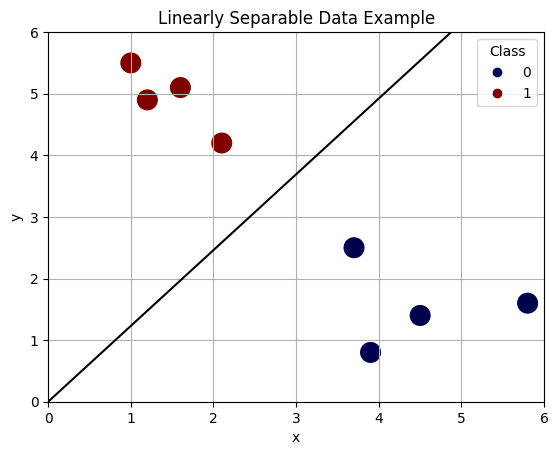

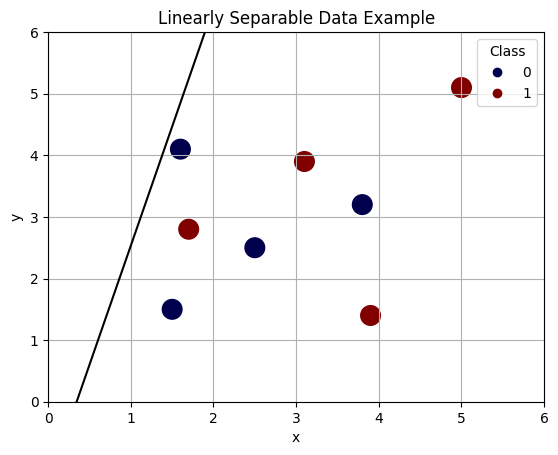

In [6]:
# Graph datasets and decision lines for both cases.
import matplotlib.pyplot as plt

# Dataset 1
data = X1
labels = Y1

plt.xlim(0,6)
plt.ylim(0,6)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

xlist = np.linspace(0, 6.0, 100) 
ylist = np.linspace(0, 6.0, 100) 
slope = (-clf1.coef_[0][0]/clf1.coef_[0][1])
intercept = -(clf1.intercept_/clf1.coef_[0][1])
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() 
plt.show() 


# Dataset 2
data = X2
labels = Y2

plt.xlim(0,6)
plt.ylim(0,6)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

xlist = np.linspace(0, 6.0, 100) 
ylist = np.linspace(0, 6.0, 100) 
slope = (-clf2.coef_[0][0]/clf2.coef_[0][1])
intercept = -(clf2.intercept_/clf2.coef_[0][1])
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() 
plt.show() 

*Discussion*

It's amusing that the perceptron converged to the line that it did for the second dataset. The second dataset is non-linearly separable, so the perceptron wasn't going to be able to perfectly separate the data. What's funny is that the perceptron did not separate any data. The line it produced has all of the data on one side and none of the data on the other side. Perhaps this is the highest accuracy it can get. Since it classifies all data as the same class, and there are 5 data points for each class, the perceptron got exactly 50% accuracy by simply classifying all of the training data the same way. This is not any better than randomly guessing which data point is in which class.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*

Perceptrons learn to classify data by using a form of linear regression and finding a line the separates the data. By nature, perceptrons will have difficulty getting perfect accuracy on non-linearly separable data. Non-linearly separable data is data that cannot be separated by a line (or a plane/hyperplane in higher dimensions). Since the data cannot be separated with a line, the perceptron generally cannot get perfect accuracy on non-linearly separable data.

There are, however, strategies and methods that allow perceptrons to accurately classify non-linearly separable data. By using feature engineering, we can simulate higher dimensions to a dataset. This can sometimes allow the perceptron to correctly separate the data by using the extra data provided by the feature engineering.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table 
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [7]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def do_split_training(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    perceptron = Perceptron(eta0=1, verbose=1)
    perceptron.fit(X_train, y_train)
    print(perceptron.score(X_train, y_train), perceptron.score(X_test, y_test))

voting_dataset_arff = arff.loadarff("voting-dataset.arff")
voting_dataset = pd.DataFrame(voting_dataset_arff[0])
voting_dataset = voting_dataset.apply(LabelEncoder().fit_transform)

X_voting = voting_dataset.iloc[:, :-1]
y_voting = voting_dataset.iloc[:, -1]

do_split_training(X_voting, y_voting)

-- Epoch 1
Norm: 13.60, NNZs: 10, Bias: -3.000000, T: 322, Avg. loss: 0.372671
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 16.76, NNZs: 15, Bias: -3.000000, T: 644, Avg. loss: 0.326087
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.84, NNZs: 15, Bias: -6.000000, T: 966, Avg. loss: 0.295031
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 21.12, NNZs: 15, Bias: -7.000000, T: 1288, Avg. loss: 0.301242
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 21.91, NNZs: 14, Bias: -8.000000, T: 1610, Avg. loss: 0.295031
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 21.73, NNZs: 14, Bias: -9.000000, T: 1932, Avg. loss: 0.263975
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 22.41, NNZs: 15, Bias: -9.000000, T: 2254, Avg. loss: 0.267081
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 23.49, NNZs: 12, Bias: -9.000000, T: 2576, Avg. loss: 0.254658
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 24.52, NNZs: 13, Bias: -10.000000, T: 2898, Avg. loss: 0.192547
To

In [8]:
print((.922+.956+.95+.969+.954)/5)
print((.913+.964+.935+.914+.961)/5)
print((9+12+21+14+7)/5)

0.9502
0.9374
12.6


| Trial | Training accuracy | Test accuracy | Number of epochs |
| ----- | ----------------- | ------------- | ---------------- |
| 1 | .922 | .913 | 9 |
| 2 | .956 | .964 | 12 |
| 3 | .950 | .935 | 21 |
| 4 | .969 | .914 | 14 |
| 5 | .954 | .961 | 7 |
| Average | .950 | .937 | 12.6 |

### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result. 
- Which specific features are most critical for the voting task, and which are least critical? 

In [9]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning 

perceptron = Perceptron(verbose=1)
perceptron.fit(X_voting, y_voting)
print(perceptron.coef_)
print(perceptron.intercept_)

-- Epoch 1
Norm: 14.28, NNZs: 12, Bias: -2.000000, T: 461, Avg. loss: 0.305857
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.26, NNZs: 11, Bias: -3.000000, T: 922, Avg. loss: 0.308026
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.97, NNZs: 15, Bias: -5.000000, T: 1383, Avg. loss: 0.255965
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.90, NNZs: 15, Bias: -5.000000, T: 1844, Avg. loss: 0.203905
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 22.43, NNZs: 14, Bias: -7.000000, T: 2305, Avg. loss: 0.253796
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 23.17, NNZs: 16, Bias: -8.000000, T: 2766, Avg. loss: 0.208243
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 23.85, NNZs: 15, Bias: -8.000000, T: 3227, Avg. loss: 0.210412
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 25.22, NNZs: 15, Bias: -10.000000, T: 3688, Avg. loss: 0.234273
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 25.69, NNZs: 14, Bias: -9.000000, T: 4149, Avg. loss: 0.277657
T

In [10]:
voting_dataset.columns[14]
# voting_dataset

'duty-free-exports'

Discuss how the different features effect prediction

We can tell which features effect the prediction the most by looking at the magnitudes of their respective weights. This is because the inputs will be multiplied by the weights, and then added together to determine the output. So a higher weight on a given feature will have a greater effect on the output. Likewise, the lowest magnitude weights will have the least amount of effect on the output.

For the voting dataset, the highest feature by far is the fourth one, `physician-fee-freeze`, with a weight of `17`. Since the weight is positive, the presence of this feature will be highly correlated with the output of `1`, or `republican`. This suggests that most republican representatives voted for `physician-fee-freeze`.

The second highest feature weight is the 11th: `synfuels-corporation-cutback`. This weight is `-10`, which is negative, and so it will correlate with the output of `0`, or `democrat`. This suggests that most democrat representatives voted for `synfuels-corporation-cutback`.

There are 2 features with weights of `0`: the first one, `handicapped-infants`; and the 14th one, `crime`. With weights of `0`, these 2 features have no effect on the output. This suggests that both democrat and republican representatives were equally likely to vote either for or against `handicapped-infants` and `crime`. In other words, if you knew that a certain representative had either voted for or against `handicapped-infants` or `crime`, you would not be able to determine if that representative was a democrat or a republican.

The other features have weights with varying magnitudes and signs. We could possibly use this information to see which policies democrat and republican representatives voted for in general. However, with such a high negative bias (`-9`), it is difficult to accurately determine which policy each party voted for in general, especially for the features with low-magnitude weights.


### 3.3 (15%) Misclassification rate vs epochs 

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 50% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [11]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.
    
def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\code\

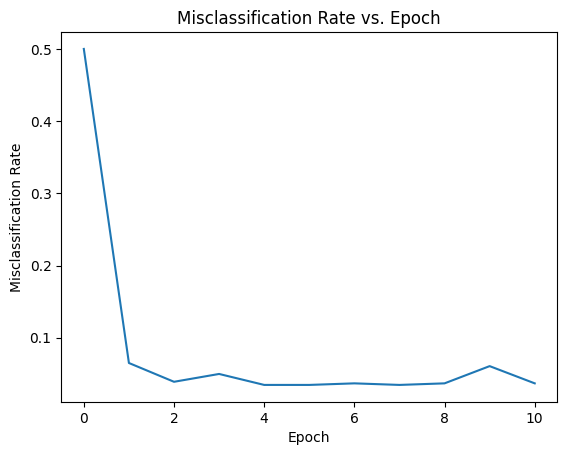

0.03687635574837311


In [12]:
random_state = 31
num_iter = 10
misclassification_rate = [0.5]
# perceptron = Perceptron(random_state=31, verbose=1)
perceptron = Perceptron(max_iter=1, warm_start=True, random_state=31)
for i in range(0, num_iter):
    perceptron.fit(X_voting, y_voting)
    misclassification_rate.append(1-perceptron.score(X_voting, y_voting))
plot_misclassification(misclassification_rate)
print(misclassification_rate[-1])

*Show table and discuss*

The misclassification rate begins at 0.5 and quickly moves down to below 0.1. After convergence, the misclassification rate is at ~0.0369. This sharp decrease in the misclassification rate makes sense, because the perceptron quickly learns which direction to push its weights. After 4 epochs, the misclassification rate stays pretty consistently around 0.03-0.04. This makes sense because by this point the perceptron has figured out the approximate true values of the weights. What surprised me is that there is a little jump in the misclassification rate at the 9th epoch. This could be because the weights were overshot a bit. They were going in the right direction, but they might have moved a little too much. In the 10th epoch, the misclassification rate was back down to it's previous value. 

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [13]:
# Run the model with different hyperparameters

def do_training(perceptron):
    perceptron.fit(X_voting, y_voting)
    print(perceptron.coef_)
    print(perceptron.intercept_)
    print(perceptron.score(X_voting, y_voting))

perceptron1 = Perceptron(warm_start=False)
perceptron2 = Perceptron(warm_start=True)
# perceptron3 = Perceptron(random_state=11)

do_training(perceptron1)
do_training(perceptron2)
do_training(perceptron2)

[[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
[-9.]
0.9609544468546638
[[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
[-9.]
0.9609544468546638
[[ -1.   0.  -8.  18.   4.  -1.   4.   8.  -8.   6. -10.   1.   1.   1.
   -7.   2.]]
[-10.]
0.9587852494577006


Discussion

### shuffle

With shuffle turned off, the accuracy on the dataset is slightly higher. This could be because the perceptron is memorizing the dataset instead of generalizing. In addition, many of the weights are different, but not significantly. Most of the signs stayed the same (except for the ones in the range -1 to 1), and most of the weights stayed within ±2 integer points. It's not a huge difference because the weights still go in the same direction with shuffle turned off, they just are slightly more or less extreme.

### eta0

I tested with eta0=1, eta0=0.1, and eta0=2. eta0=1 is the default and gave the normal weights and bias. The other two were ended up with weights that were approximately multiples of the normal weights and bias. With eta0=2, the weights and bias were exactly double that of the weights and bias with eta0=1. This works, because the weights will push the output twice as far, but the output has to go twice as far for it to change because the bias is also twice as large. With eta0=0.1, a few of the weights were exactly one-tenth of the eta0=1 ones, but many were slightly different. This could be because the weights are taking smaller steps, and so they reach different optimal points. In all three cases, the accuracy was the exact same. With this particular dataset and model, the learning rate does not seem to have a significant effect on the accuracy.

### verbose

The only numbers that seem to mean anything for the verbose hyperparameter are 0 and 1. I tested with numbers greater than 1, but the output stayed the same. With a value of 0, the .fit method does not print anything. With a value of 1, the .fit method prints out information after each epoch. The value of verbose does not effect the outcome of the weights, bias, or accuracy. This makes sense, since logging information should have no effect on the mathematical process.

### fit_intercept

The default for fit_intercept is True. This results in the normal weights. Setting fit_intercept to False results in different weights and a bias of 0. This makes sense, as the bias is directly related to the y-intercept of the resulting separation line (or hyperplane, since the dimension of this data is greater than 3). If the perceptron should not move the intercept, then the bias should stay at 0. With fit_intercept set to False, the weights are different, but generally have the same sign as when fit_intercept is True. This makes sense, as the weights effect the slope of the line, so slightly different weights will mean a slightly different slope to compensate for the intercept staying at the origin. In addition, the accuracy is slightly less with fit_intercept set to False. This is likely because the perceptron has one less weight to adjust, so it can't get as accurate.

### random_state

According to the documentation, random_state effects the shuffling of the data when shuffle=True. I tested with values of 0, 371, and 11. With random_state=0, the weights and bias were the same as the normal weights and bias. This makes sense because the default value for random_state is 0. With random_state=371, the weights were different, but generally not significantly different. The bias was increased by one, but the accuracy stayed the same. This is likely the effect of the data being shuffled differently after each epoch. With a different data order, the weights learn on the same data but in a different order. With random_state=11, the weights and bias were again slightly different, but in this case the accuracy was a whole percentage point better. It surprised me that the accuracy would increase by that much by simply changing the random state, but it did. Maybe another value for random_state would result in an even higher accuracy rate. 

### warm_start

The default for warm_start is False, so it was no surprise that setting warm_start to False resulted in the normal weights and bias. Setting warm_start to True and running .fit initially resulted in the same weights and bias as well. However, I called .fit on the perceptron again, and this time it kept training. The resulting weights and bias were very similar to the normal ones, but they were slightly different. It was somewhat surprising to note that the accuracy dropped down after training again. However, after further thought, this made sense. After the first call to .fit, the weights had converged to values that got a fairly high accuracy rate. Training them again did not increase the accuracy; the weights were already at (or at least very close to) a local minimum. The further training simply pushed the weights a little bit too far, so the accuracy dipped down a bit.

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [43]:
# Load and Train on your dataset and report results

weather_df = pd.read_csv("./weatherAUS.csv")
weather_df_backup = weather_df.copy()

weather_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True) # drop rows without target value or RainToday value
target_col = ['RainTomorrow']
number_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
category_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
number_cols = [x for x in number_cols if x not in ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']] # drop these columns because we only have about half the data

# use mean values to populate missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(weather_df[number_cols])
weather_df[number_cols] = imputer.transform(weather_df[number_cols])

# scale values to be from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(weather_df[number_cols])

weather_df[number_cols] = scaler.transform(weather_df[number_cols])

# convert the categorical data into one-hot features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(weather_df[category_cols])

encoded_cols = list(encoder.get_feature_names_out(category_cols))
weather_df[encoded_cols] = encoder.transform(weather_df[category_cols])

# train perceptron
weather_train_X, weather_test_X, weather_train_y, weather_test_y = train_test_split(
    weather_df[number_cols + encoded_cols], weather_df[target_col], test_size=0.3
)

weather_perceptron = Perceptron()
weather_perceptron.fit(weather_train_X, weather_train_y)

print(weather_perceptron.coef_)
print(weather_perceptron.intercept_)
print(weather_perceptron.score(weather_test_X, weather_test_y))

C:\Users\hende\AppData\Local\Temp\ipykernel_17300\332644252.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weather_df[encoded_cols] = encoder.transform(weather_df[category_cols])
C:\Users\hende\AppData\Local\Temp\ipykernel_17300\332644252.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weather_df[encoded_cols] = encoder.transform(weather_df[category_cols])
C:\Users\hende\AppData\Local\Temp\ipykernel_17300\332644252.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

[[  4.29963698 -10.30844692  10.02210243  16.96948533  -0.37664672
   -9.28739423   0.37182365  21.39308852  22.26629729 -37.63000474
    2.10834759   2.69619015   5.           0.           3.
    1.           2.          -1.           3.           1.
   -1.          -2.           0.           4.           1.
    0.          -3.           1.           0.          -2.
    0.          -1.           2.          -1.          -1.
   -5.          -3.          -1.          -5.          -1.
   -3.           1.           3.          -2.           2.
   -4.          -3.           2.           3.           0.
    3.          -5.           1.          -1.           2.
   -2.          -1.           1.           1.          -3.
    2.          -2.           1.           0.          -1.
    0.          -1.           3.          -2.          -1.
    1.           2.          -3.           0.          -3.
   -1.          -1.           1.           1.          -1.
   -1.           1.          -2.        

*Discuss how the perceptron did on the data set and why you think it performed as such.*

## 5. (Optional 15% extra credit) Code up your own perceptron learner 

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [12]:
# Your Perceptron Code

*Discussion*

In [ ]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        pass